**<h3>Data Installation</h3>**

In [86]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('blinkit_retail.csv')
df.head()

,Title,Price_discount,Price_original,Details,Tag,Date,Place
0,Onion 1 kg (Pyaz),₹ 40,₹ 50,NaN,NaN,20240117,Bengaluru
1,Desi Tomato (Tamatar),₹ 19,₹ 25,NaN,NaN,20240117,Bengaluru
2,Red Carrot (Gajar),₹ 15,₹ 20,500 g,NaN,20240117,Bengaluru
3,Ginger (Adrak),₹ 37,₹ 49,200 g,NaN,20240117,Bengaluru
4,Green Chilli (Hari Mirch),₹ 11,₹ 14,100 g,NaN,20240117,Bengaluru


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116554 entries, 0 to 116553
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Title           116554 non-null  object
 1   Price_discount  116553 non-null  object
 2   Price_original  99047 non-null   object
 3   Details         88227 non-null   object
 4   Tag             10521 non-null   object
 5   Date            116554 non-null  int64 
 6   Place           116554 non-null  object
dtypes: int64(1), object(6)
memory usage: 6.2+ MB


**<h3>Preprocessing</h3>**

In [88]:
df.isnull().sum()
df.drop_duplicates(inplace=True)

In [89]:
df['Price_original'] = df['Price_original'].apply(lambda x: str(x) if pd.notnull(x) else '')
df['Price_original'] = df['Price_original'].str.replace(r'[^\d.]', '', regex=True)
df['Price_original'] = pd.to_numeric(df['Price_original'], errors='coerce')
df = df.dropna(subset=['Price_original'])

<Axes: xlabel='Price_original', ylabel='Count'>

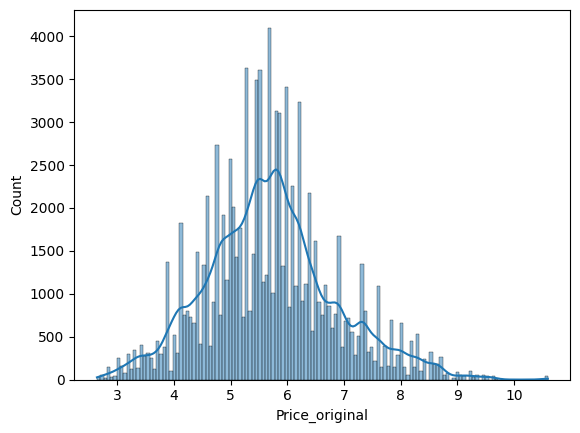

In [93]:
sns.histplot(np.log(df.Price_original),kde=True)